<a href="https://colab.research.google.com/github/duskovesic/Machine-Learning/blob/main/NN_BinarnaKlasifikacija_Validacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uvod


Kao i u prethodnoj svesci i u ovoj je primer rešavanja problema binarne klasifikacije. Koristi se baza podataka „Breast Cancer Database“. Takođe je kreirana mreža sa dva skrivena sloja, ali je pri treniranju ove mreže upotrebljen skup za validaciju podataka.

# Importovanje biblioteka i setapovanje

In [ ]:
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

from matplotlib import pyplot as plt

RS = 123
NUM_NEURONS_1 = 30
NUM_NEURONS_2 = 15
BATCH_SIZE = 32
NUM_EPOCHS = 50

# Učitavanje podataka

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X.shape, y.shape

((569, 30), (569,))

# Train-val-test podela

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=RS, stratify=y)

In [ ]:
X_train_val.shape, X_test.shape, y_train_val.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=RS, stratify=y_train_val)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((318, 30), (80, 30), (318,), (80,))

In [ ]:
np.sum(y_train == 1)/len(y_train), np.sum(y_val == 1)/len(y_val), np.sum(y_test == 1)/len(y_test)

(0.6289308176100629, 0.625, 0.6257309941520468)

# Standardizacija

In [ ]:
X_train, X_val, X_test

(array([[8.726e+00, 1.583e+01, 5.584e+01, ..., 1.050e-01, 2.926e-01,
         1.017e-01],
        [1.617e+01, 1.607e+01, 1.063e+02, ..., 1.251e-01, 3.153e-01,
         8.960e-02],
        [1.917e+01, 2.480e+01, 1.324e+02, ..., 1.767e-01, 3.176e-01,
         1.023e-01],
        ...,
        [1.513e+01, 2.981e+01, 9.671e+01, ..., 6.575e-02, 3.233e-01,
         6.165e-02],
        [1.388e+01, 1.616e+01, 8.837e+01, ..., 4.537e-02, 2.542e-01,
         6.623e-02],
        [1.051e+01, 2.019e+01, 6.864e+01, ..., 6.136e-02, 2.383e-01,
         9.026e-02]]),
 array([[1.207e+01, 1.344e+01, 7.783e+01, ..., 7.393e-02, 2.781e-01,
         8.052e-02],
        [1.289e+01, 1.411e+01, 8.495e+01, ..., 1.561e-01, 2.639e-01,
         1.178e-01],
        [1.405e+01, 2.715e+01, 9.138e+01, ..., 1.048e-01, 2.250e-01,
         8.321e-02],
        ...,
        [1.321e+01, 2.806e+01, 8.488e+01, ..., 7.958e-02, 2.473e-01,
         6.443e-02],
        [1.665e+01, 2.138e+01, 1.100e+02, ..., 2.095e-01, 3.613e-01,
   

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
X_train, X_val, X_test

(array([[-1.46404081, -0.79260017, -1.42475307, ..., -0.13749859,
          0.01963809,  0.89821962],
        [ 0.58552472, -0.73564471,  0.59940964, ...,  0.1617225 ,
          0.37315305,  0.25124161],
        [ 1.41151835,  1.33610979,  1.64639036, ...,  0.92987215,
          0.40897174,  0.93030117],
        ...,
        [ 0.29918026,  2.52505481,  0.21471443, ..., -0.72179848,
          0.49773982, -1.24322411],
        [-0.04498375, -0.71428642, -0.11983803, ..., -1.02518782,
         -0.57837841, -0.99833492],
        [-0.97284993,  0.24209051, -0.91129127, ..., -0.78715074,
         -0.82599461,  0.28653132]]),
 array([[-5.43333243e-01, -1.35978152e+00, -5.42641736e-01, ...,
         -6.00025914e-01, -2.06175433e-01, -2.34259238e-01],
        [-3.17561650e-01, -1.20078089e+00, -2.57028606e-01, ...,
          6.23207754e-01, -4.27316949e-01,  1.75907465e+00],
        [ 1.82255408e-03,  1.89379857e+00,  9.05723214e-04, ...,
         -1.40475916e-01, -1.03312012e+00, -9.04269378e-

# Kreiranje mreže

In [ ]:
model = Sequential([
    InputLayer(input_shape=((X_train.shape[1],))),
    Dense(units=NUM_NEURONS_1, activation="relu"),
    Dense(units=NUM_NEURONS_2, activation="relu"),
    Dense(units=1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 15)                465       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", metrics="accuracy", loss="binary_crossentropy")

#Treniranje mreže

In [ ]:
history = model.fit(X_train, y_train, validation_data=((X_val, y_val)), batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1)

Epoch 1/50
10/10 [==============================] - 1s 24ms/step - loss: 0.8320 - accuracy: 0.3868 - val_loss: 0.7303 - val_accuracy: 0.4625
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5928 - accuracy: 0.7044 - val_loss: 0.5562 - val_accuracy: 0.7875
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.4481 - accuracy: 0.9057 - val_loss: 0.4408 - val_accuracy: 0.9250
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.3540 - accuracy: 0.9465 - val_loss: 0.3602 - val_accuracy: 0.9750
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2915 - accuracy: 0.9497 - val_loss: 0.2994 - val_accuracy: 0.9750
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2456 - accuracy: 0.9497 - val_loss: 0.2528 - val_accuracy: 0.9750
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 0.2116 - accuracy: 0.9560 - val_loss: 0.2168 - val_accuracy: 0.9750
Epoch 8/50
10/10 [=

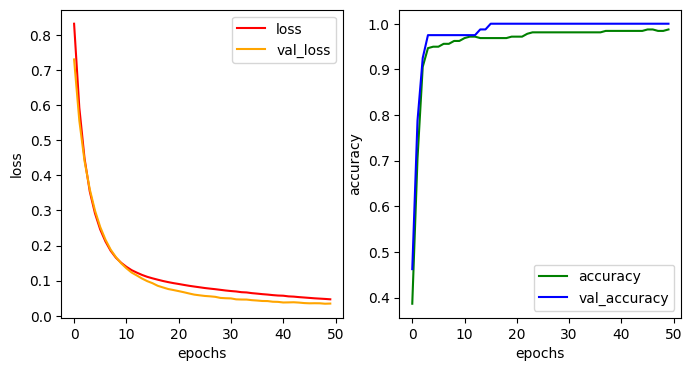

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(history.epoch, history.history["loss"], label="loss", color="red")
ax[0].plot(history.epoch, history.history["val_loss"], label="val_loss", color="orange")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("loss")
ax[0].legend()

ax[1].plot(history.epoch, history.history["accuracy"], label="accuracy", color="green")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="val_accuracy", color="blue")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("accuracy")
ax[1].legend()

plt.show()

#Ocenjivanje mreže

In [ ]:
scores = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

6/6 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 0.9883


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
scores

[0.06605847924947739, 0.988304078578949]

In [ ]:
y_predict = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [ ]:
y_predict

array([[9.9996126e-01],
       [9.0116787e-01],
       [8.9616126e-01],
       [9.9853599e-01],
       [2.6849922e-04],
       [3.4109957e-09],
       [4.5278217e-03],
       [9.9988300e-01],
       [9.8777652e-01],
       [9.9996054e-01],
       [1.5874824e-05],
       [9.9432963e-01],
       [2.6393915e-02],
       [3.1311575e-03],
       [5.2983728e-03],
       [9.9992162e-01],
       [7.1729912e-05],
       [9.9144953e-01],
       [9.8825467e-01],
       [8.2880390e-01],
       [9.9978358e-01],
       [9.9986464e-01],
       [1.6077384e-03],
       [9.2722321e-01],
       [3.9760862e-03],
       [9.6254033e-01],
       [9.9648124e-01],
       [9.9986213e-01],
       [9.9643660e-01],
       [1.1372729e-03],
       [9.9994957e-01],
       [8.9074992e-02],
       [9.9324429e-01],
       [9.9432963e-01],
       [9.8404664e-01],
       [9.9998343e-01],
       [9.1364840e-03],
       [9.9958175e-01],
       [9.9866438e-01],
       [9.9829048e-01],
       [9.6217990e-01],
       [9.994903

In [ ]:
y_test.shape, y_predict.shape

((171,), (171, 1))

In [ ]:
y_predict = y_predict.reshape(171)
y_predict

array([9.9996126e-01, 9.0116787e-01, 8.9616126e-01, 9.9853599e-01,
       2.6849922e-04, 3.4109957e-09, 4.5278217e-03, 9.9988300e-01,
       9.8777652e-01, 9.9996054e-01, 1.5874824e-05, 9.9432963e-01,
       2.6393915e-02, 3.1311575e-03, 5.2983728e-03, 9.9992162e-01,
       7.1729912e-05, 9.9144953e-01, 9.8825467e-01, 8.2880390e-01,
       9.9978358e-01, 9.9986464e-01, 1.6077384e-03, 9.2722321e-01,
       3.9760862e-03, 9.6254033e-01, 9.9648124e-01, 9.9986213e-01,
       9.9643660e-01, 1.1372729e-03, 9.9994957e-01, 8.9074992e-02,
       9.9324429e-01, 9.9432963e-01, 9.8404664e-01, 9.9998343e-01,
       9.1364840e-03, 9.9958175e-01, 9.9866438e-01, 9.9829048e-01,
       9.6217990e-01, 9.9949038e-01, 9.9998176e-01, 1.2608531e-02,
       1.4645015e-06, 9.9966443e-01, 9.9943280e-01, 9.9708474e-01,
       9.4991559e-01, 9.9961382e-01, 9.9507707e-01, 2.8827735e-06,
       9.9929684e-01, 3.3683008e-01, 9.9562329e-01, 9.9410880e-01,
       1.9380312e-05, 9.9978560e-01, 9.6551913e-01, 9.9890953e

In [ ]:
y_test.shape, y_predict.shape

((171,), (171,))

In [ ]:
y_predict_01 = np.where(y_predict < 0.5, 0, 1)

In [ ]:
y_predict_01

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
np.count_nonzero(np.where(y_predict_01 != y_test))

2

In [ ]:
np.count_nonzero(np.where(y_predict_01 < y_test)), np.count_nonzero(np.where(y_predict_01 > y_test))

(0, 2)

In [ ]:
print(confusion_matrix(y_test, y_predict_01))

[[ 62   2]
 [  0 107]]
